# Testing Wavelength Calibration

In [36]:
from ccdproc import (CCDData, ImageFileCollection)
from scipy import (signal, interpolate)
import os
import glob
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.io.fits.header import Header

import sys
sys.path.append('/user/simon/development/soar/goodman')

# import goodman
from pipeline.core import (read_fits, write_fits)
from pipeline.wcs.wcs import WCS

plt.rcParams["figure.figsize"] = [16,9]

## Read Data Calibrated Automatically

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Master Flat used: norm_master_flat_1200m2_1.03_dome.fits
2017-06-12T09:00:43.783 : ./data/gcfzsto_0171_HD177409_G1200M2_slit103.fits


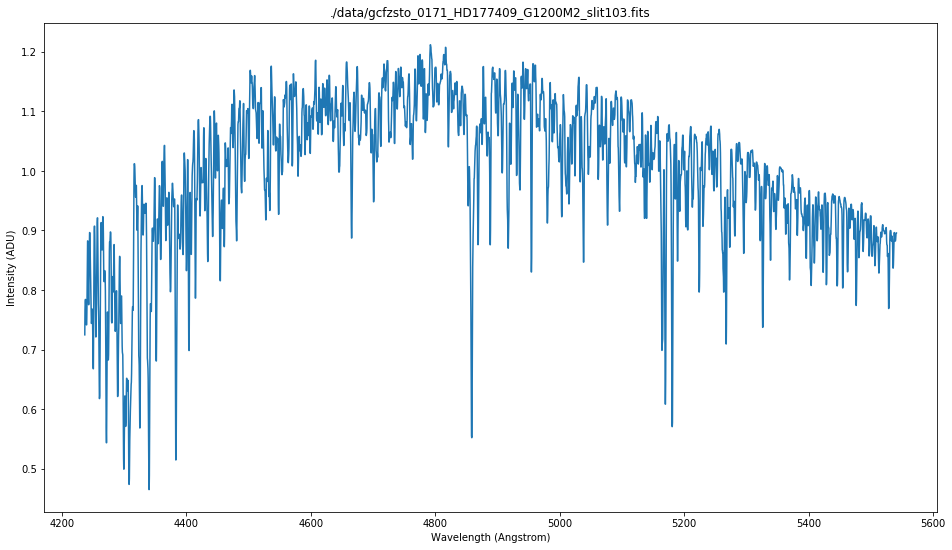

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Master Flat used: norm_master_flat_HD177409_1200m2_1.03_sky.fits
2017-06-13T10:29:31.049 : ./data/gcfzsto_0085_HD177409_G1200M2_slit103.fits


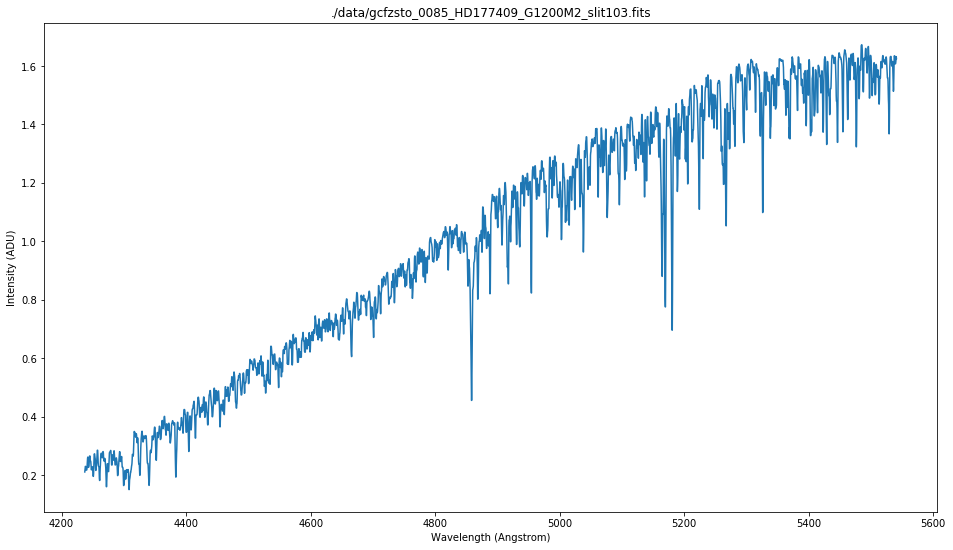

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Master Flat used: norm_master_flat_1200m2_1.03_dome.fits
2017-06-11T08:38:56.186 : ./data/gcfzsto_0109_HD177409_G1200M2_slit103.fits


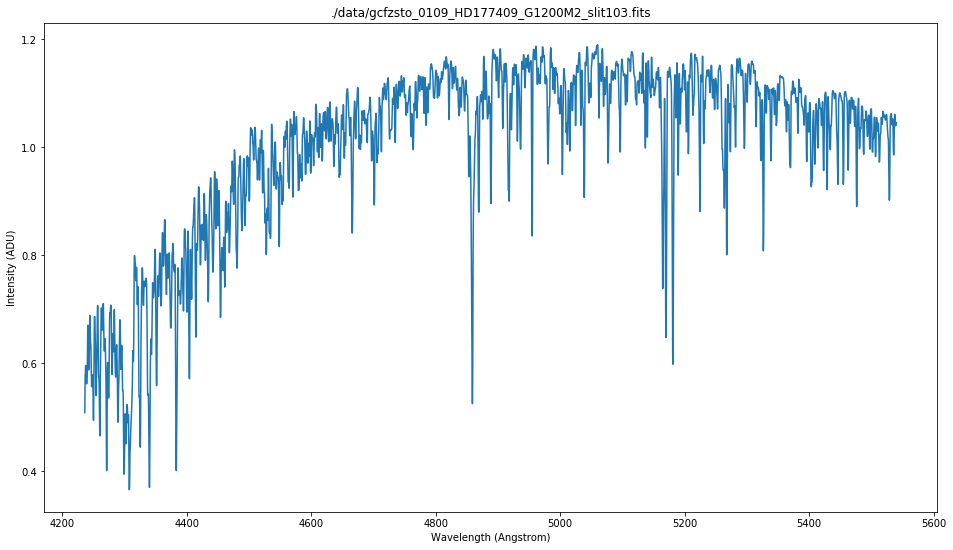

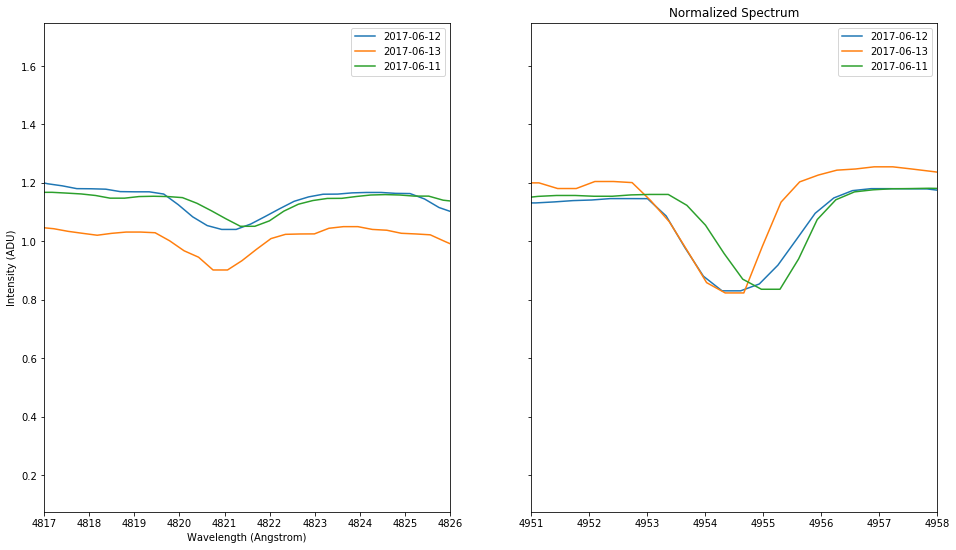

In [71]:
def normalize_data(data):
    return data/np.mean(data)

def aller_test(image_list):
    wcs = WCS()
    assert isinstance(wcs, WCS)
    all_data = []
    all_dates = []
    for file_name in image_list:
    
        ccd = CCDData.read(file_name, unit=u.adu)
        print("Master Flat used: {:s}".format(ccd.header['GSP_FLAT']))
        print("{:s} : {:s}".format(ccd.header['DATE-OBS'], file_name))
        # print(ccd.header["GSP_*"])
        wav, intens = wcs.read(ccd=ccd)
        all_data.append([wav, normalize_data(intens)])
        all_dates.append(ccd.header['DATE'])
        plt.title(file_name)
        plt.plot(wav, normalize_data(intens))
        plt.xlabel("Wavelength (Angstrom)")
        plt.ylabel("Intensity (ADU)")
        plt.show()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    
    plt.title("Normalized Spectrum")
    for i in range(len(all_data)):
        ax1.plot(all_data[i][0], all_data[i][1], label=all_dates[i])
        ax1.set_xlim(4817, 4826)
        ax2.plot(all_data[i][0], all_data[i][1], label=all_dates[i])
        ax2.set_xlim(4951, 4958)
        ax1.set_xlabel("Wavelength (Angstrom)")
        ax1.set_ylabel("Intensity (ADU)")
        ax1.legend(loc='best')

    plt.legend(loc='best')
    plt.show()
    return all_data


files = glob.glob('./data/g*HD*fits')

all_data = aller_test(image_list=files)

    

# The Comparison Lamps

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Master Flat used: norm_master_flat_1200m2_1.03_sky.fits
2017-06-13T09:36:08.656 : ./data/gcfzsto_0080_CuHeAr_G1200M2_slit103.fits


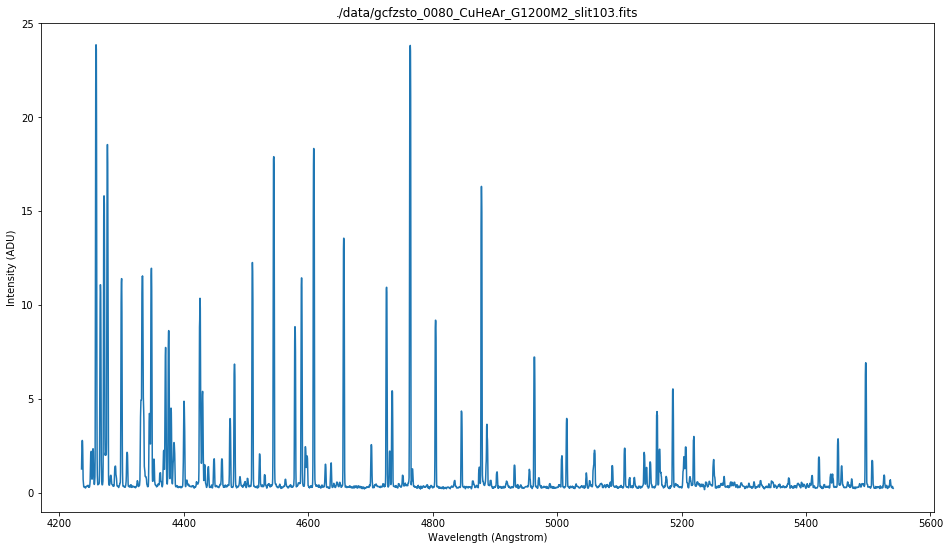

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Master Flat used: norm_master_flat_1200m2_1.03_dome.fits
2017-06-11T08:34:49.619 : ./data/gcfzsto_0108_CuHeAr_G1200M2_slit103.fits


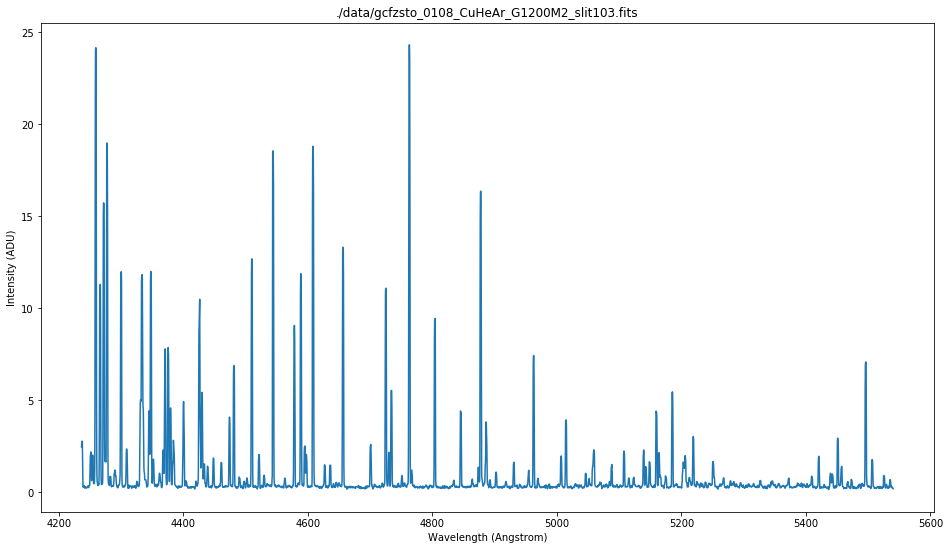

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Master Flat used: norm_master_flat_1200m2_1.03_dome.fits
2017-06-12T08:57:10.467 : ./data/gcfzsto_0170_CuHeAr_G1200M2_slit103.fits


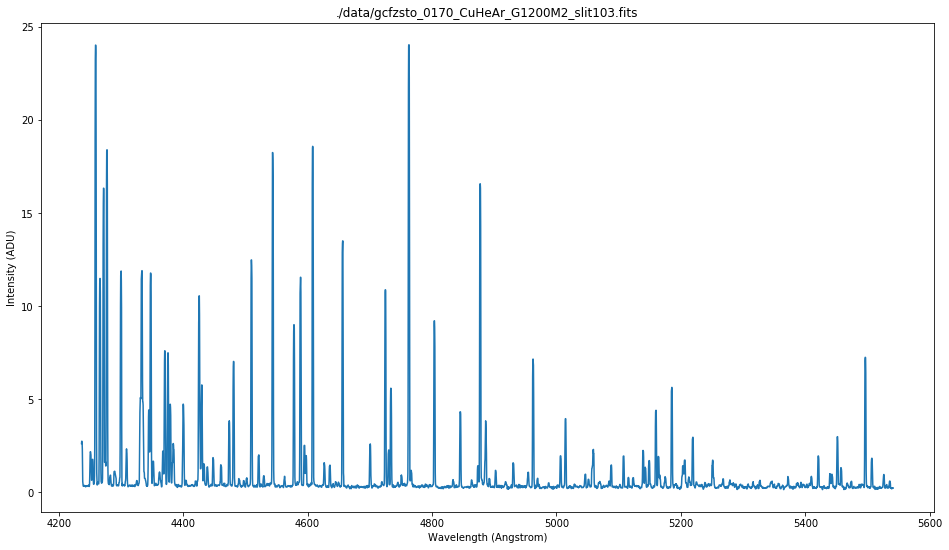

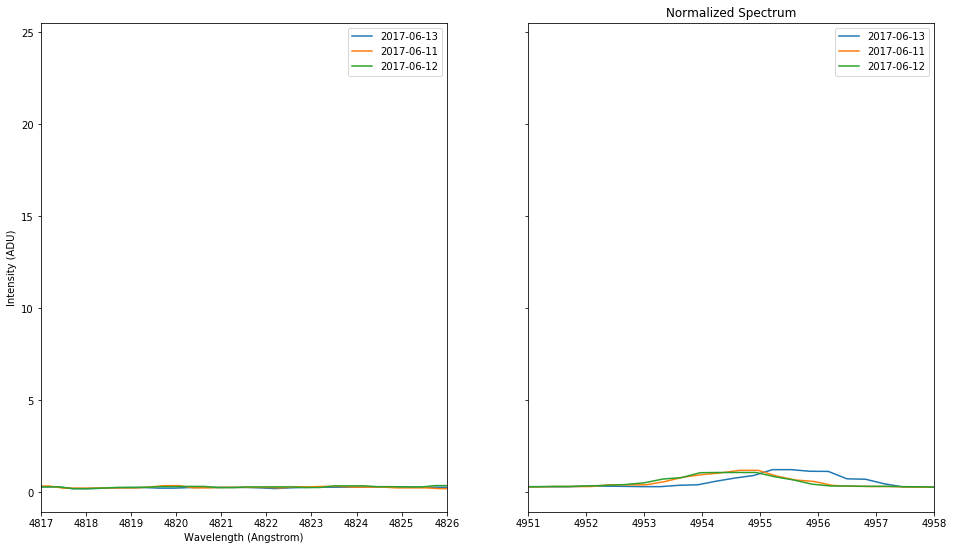

In [75]:
lamp_files = glob.glob("./data/g*Cu*fits")

all_lamps = aller_test(lamp_files)



[[0, 507], [507, 1014], [1014, 1522], [1522, 2029], [2029, 2536], [2536, 3044], [3044, 3551], [3551, 4059]]


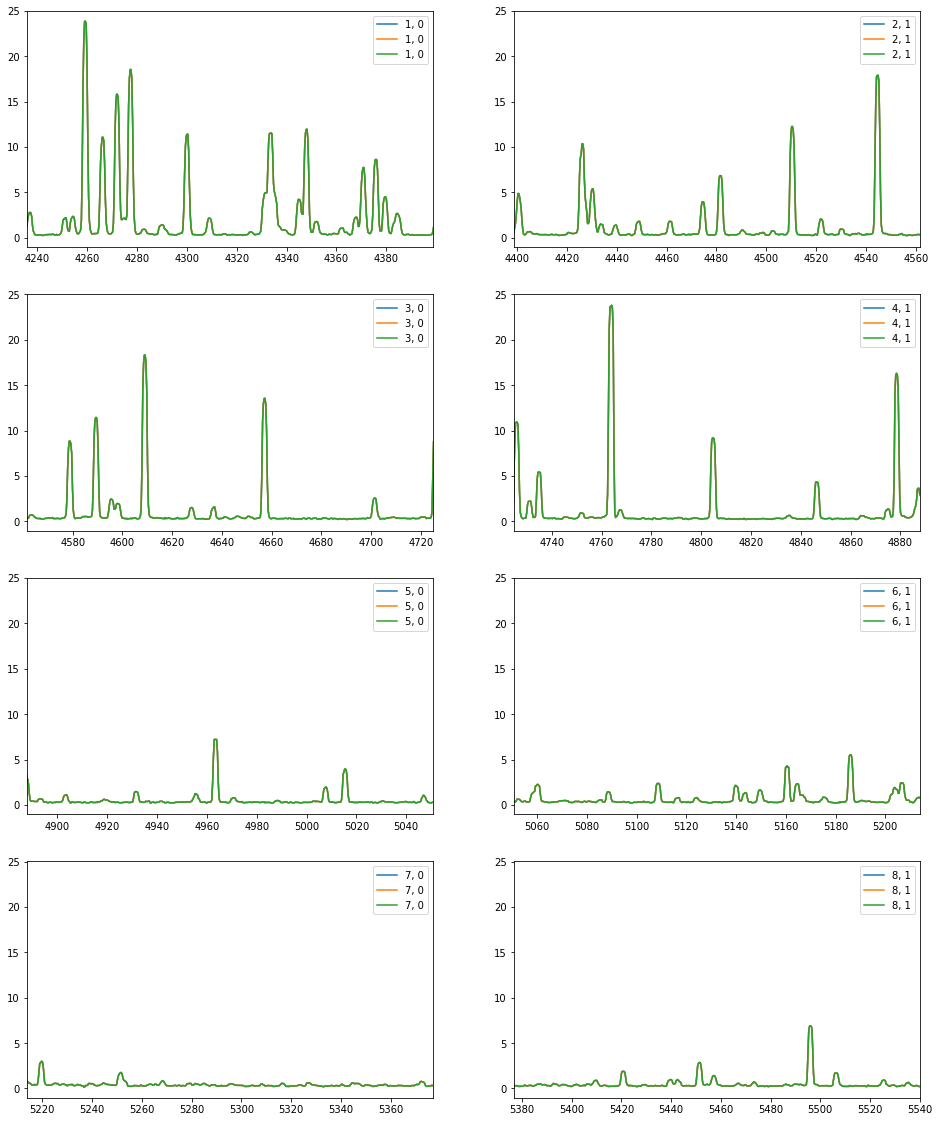

In [133]:
fig2, axes = plt.subplots(4, 2, figsize=(16, 20))
limits = np.linspace(0, len(all_lamps[0][1])-1, 9)
all_limits = [[int(limits[i]), int(limits[i + 1])] for i in range(0, len(limits)-1, 1)]
print(all_limits)

for lamp in all_lamps:
    z=0
    for i in range(4):
        for e in range(2):
            # print(i, e)
            # print(i * e, i * e +1)
            # print(all_limits[z])
            axes[i, e].plot(all_lamps[0][0], all_lamps[0][1], label = "{:d}, {:d}".format(z+1, e))
            axes[i, e].set_xlim((all_lamps[0][0][all_limits[z][0]], all_lamps[0][0][all_limits[z][1]]))
            axes[i, e].legend(loc='best')

            z += 1
#     for ax in sub_ax:
#         ax.plot(all_lamps[0])

plt.show()

# for lamp in all_lamps:
#     plt.plot(lamp[0], lamp[1])
# plt.show()

![Flux](img/RVstd_flux_TwoLines_ThreeNights.png)

# Attempt to extract from Data

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
1538 4060
Model: Gaussian1D
Name: Gaussian_776
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude    mean    stddev  
    ------------- ----- -----------
    18200.1269531 776.0 6.076487004
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
         c0              c1                c2       
    ------------ ----------------- -----------------
    786.45440967 -0.00497729892796 1.27611659091e-07


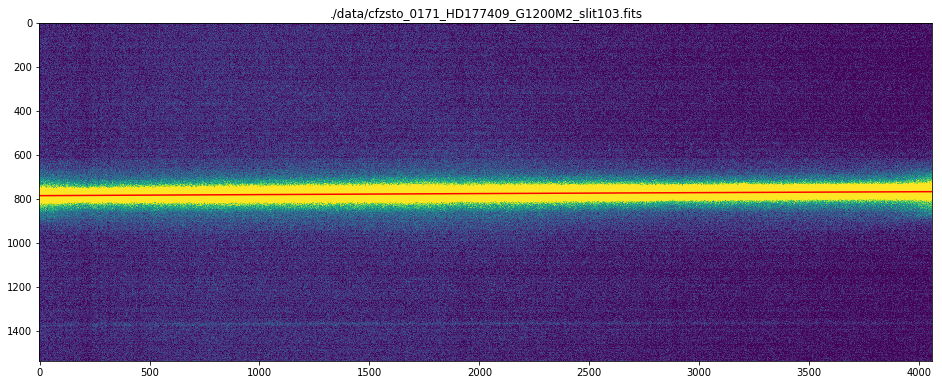

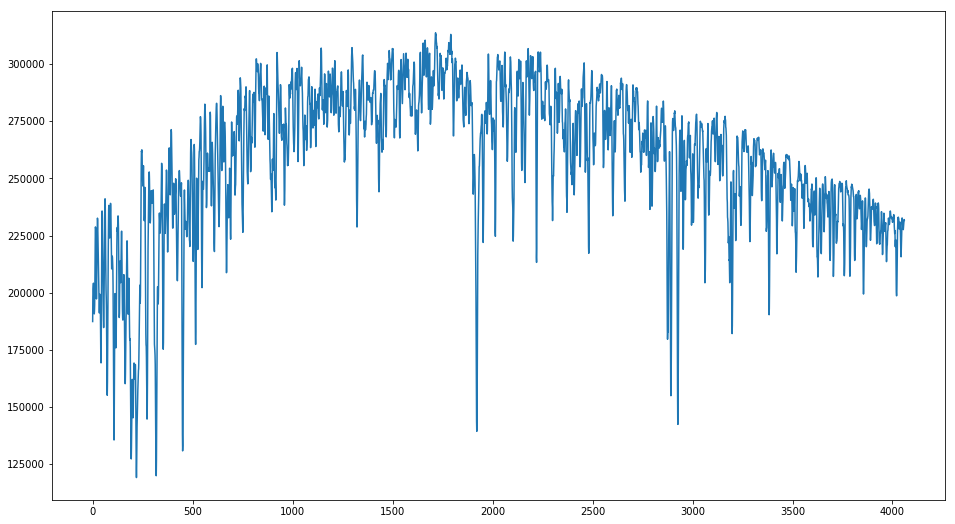

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
1537 4060
Model: Gaussian1D
Name: Gaussian_778
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude    mean    stddev   
    ------------- ----- ------------
    25339.2070312 778.0 4.7411505879
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
          c0              c1                c2        
    ------------- ----------------- ------------------
    788.317963152 -0.00367751912956 -6.46205167351e-08


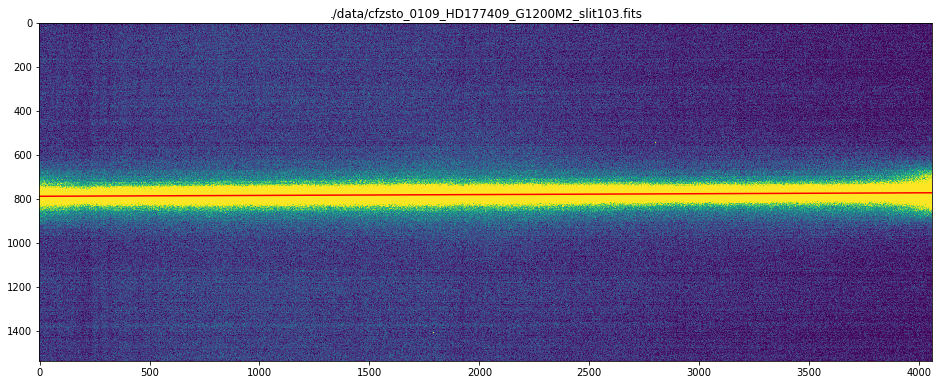

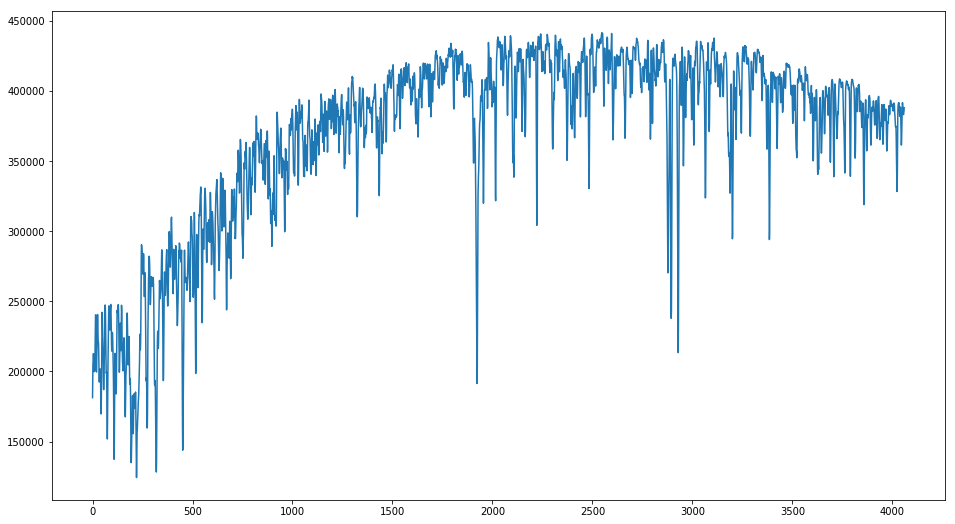

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
1537 4060
Model: Gaussian1D
Name: Gaussian_791
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
      amplitude    mean     stddev   
    ------------- ----- -------------
    10355.5458984 791.0 4.35419592731
Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
          c0              c1                c2        
    ------------- ----------------- ------------------
    800.987142731 -0.00303007390316 -1.80327901544e-07


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


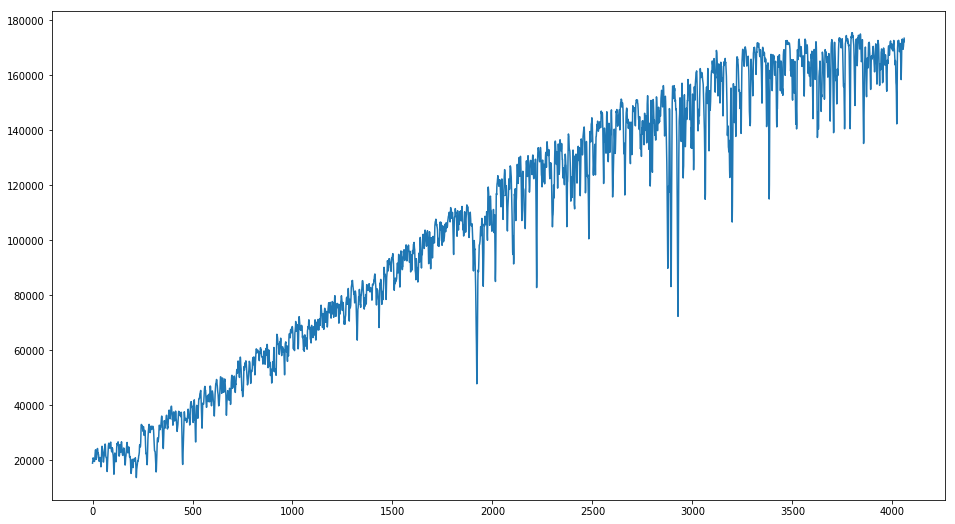

In [35]:
sys.path.append('/user/simon/development/soar/goodman')

# import goodman
from pipeline.core import identify_targets, trace ,extraction
from astropy.modeling import models, fitting
import glob
# from goodman.pipeline.core import extraction

plt.rcParams["figure.figsize"] = [16,9]
n_sigmas = 3

images = glob.glob("./data/c*fits")
for image in images:
    ccd = CCDData.read(image, unit=u.adu)
    spatial, dispersion = ccd.data.shape
    print(spatial, dispersion)
    
    target = identify_targets(ccd=ccd)
    print(target[0])
    trace_model  = models.Polynomial1D(degree=2)
    trace_fitter = fitting.LevMarLSQFitter()

    traces = trace(ccd=ccd,
                   model=target[0],
                   trace_model=trace_model,
                   fitter=trace_fitter,
                   sampling_step=5)
    print(traces)
    extracted= extraction(ccd=ccd,
                          trace=traces,
                          spatial_profile=target[0],
                          extraction='fractional')
    # print(traces)
    
    
    plt.title(image)
    plt.plot(traces(range(dispersion)), color='r')
    plt.imshow(ccd.data, clim=(5, 80))
    plt.show()
    
    plt.plot(extracted.data)
    plt.show()
